# A. Simple Realtime Chatbot 

In [2]:
from langchain.llms import OpenAI

In [3]:
import os
from dotenv import load_dotenv

load_dotenv()
MY_ENV_VAR = os.getenv('OPENAI_API_KEY')

In [4]:
import os
os.environ['OPENAI_API_KEY'] = MY_ENV_VAR

## 1. OPENAI LLM

In [6]:
llm = OpenAI(model_name="gpt-3.5-turbo",temperature=0.6)

question = "WHat is the capital of India?"
print(llm.predict(question))

c:\Users\ashiyadav\AppData\Local\anaconda3\lib\site-packages\langchain\llms\openai.py:216: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(
c:\Users\ashiyadav\AppData\Local\anaconda3\lib\site-packages\langchain\llms\openai.py:811: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(


The capital of India is New Delhi.


In [9]:
llm = OpenAI(model_name="gpt-3.5-turbo",temperature=0.9)

question = "WHat is the capital of India?"
print(llm.predict(question))

c:\Users\ashiyadav\AppData\Local\anaconda3\lib\site-packages\langchain\llms\openai.py:216: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(
c:\Users\ashiyadav\AppData\Local\anaconda3\lib\site-packages\langchain\llms\openai.py:811: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(


The capital of India is New Delhi.


In [10]:
question2 = "Can you write a poem for me on AI?"
print(llm.predict(question2))

In the realm of ones and zeroes,
Lies a world of endless possibilities,
Where artificial minds do grow,
And shape our future destinies.

A symphony of algorithms,
Dance within the silicon heart,
Creating intelligence so sublime,
A work of technological art.

Unraveling mysteries of the mind,
AI seeks to understand,
To learn, adapt, and refine,
A digital masterplan.

But with great power comes great responsibility,
As we tread this uncharted land,
We must ensure our creations act nobly,
Guided by a compassionate hand.

For AI is not just machines,
But reflections of our own design,
It's up to us to shape its dreams,
And ensure a future that's truly divine.

So let us embrace this evolution,
With curiosity and care,
For in this age of revolution,
AI will take us where.


### WHAT ALL THE MODELS CAN BE USED WITH THIS OPENAI API OR OBJECT

- ALL MODELS
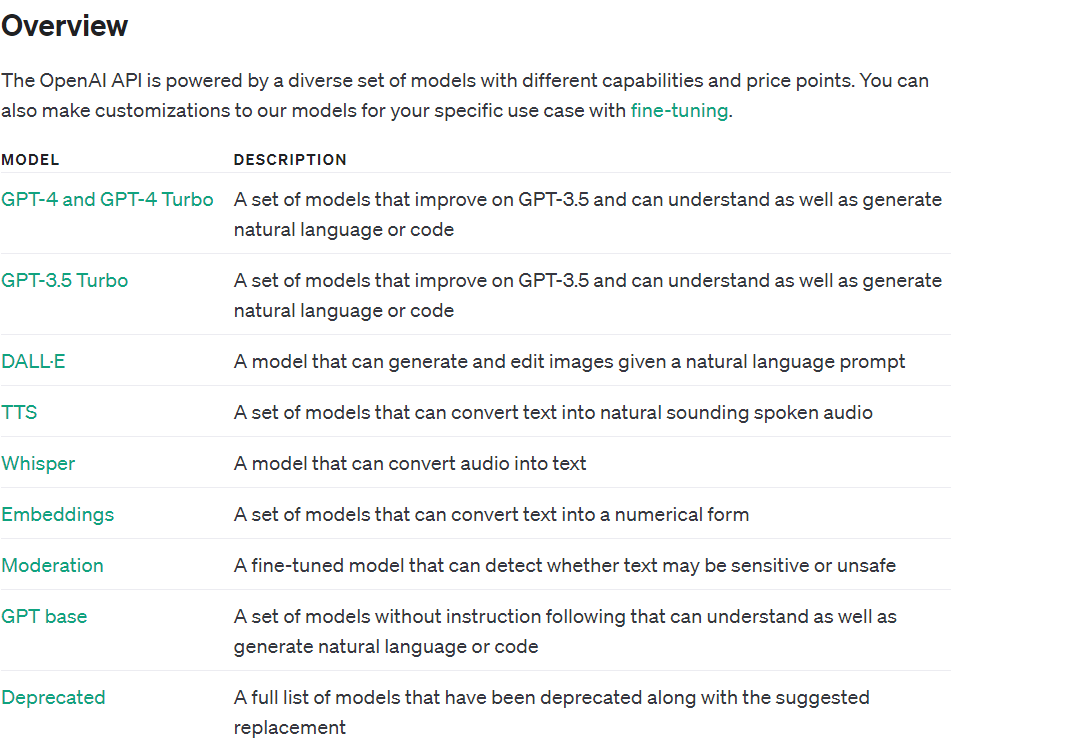

- MODEL WHICH WILL BE CALLED BY DEFAULT
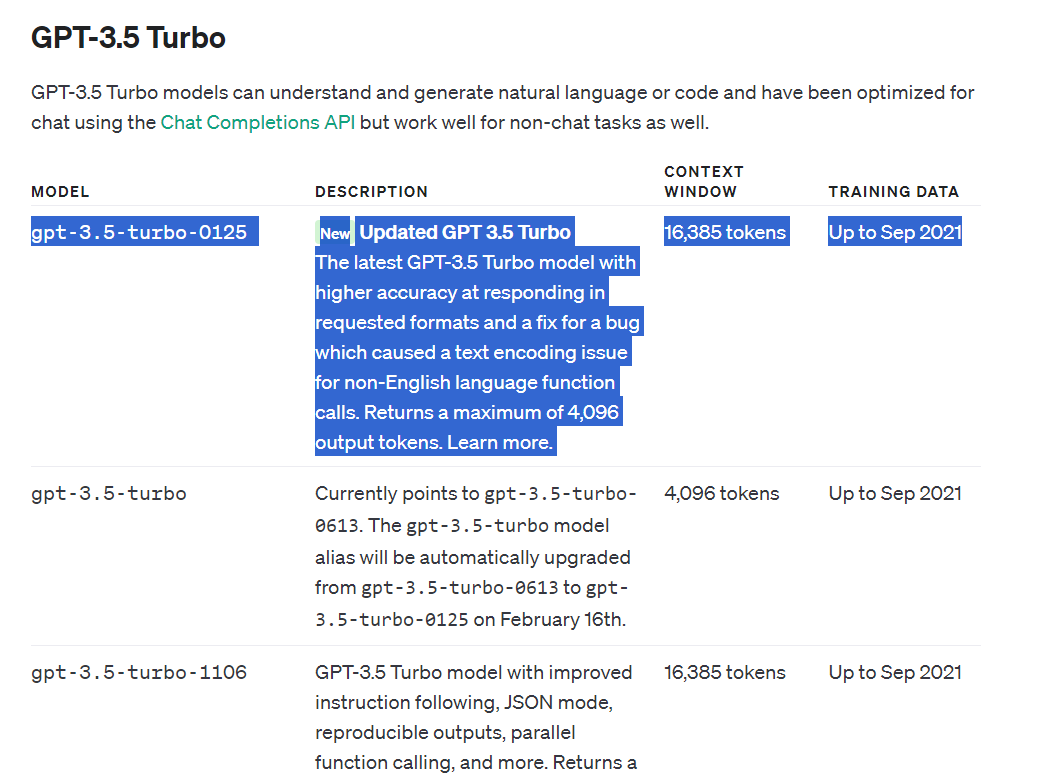

## 2. Huggingface_hub LLMs

In [11]:
import os
from dotenv import load_dotenv

load_dotenv()
MY_ENV_VAR_HF = os.getenv('HUGGINGFACEHUB_API_TOKEN')

In [12]:
os.environ['HUGGINGFACEHUB_API_TOKEN'] = MY_ENV_VAR_HF

In [13]:
from langchain import HuggingFaceHub

llm_huggingface = HuggingFaceHub(repo_id="google/flan-t5-large",model_kwargs={"temperature":0.6,"max_length":64})


question = "Can you tell me the capital of Russia?"
output = llm_huggingface.predict(question)
print(output)

moscow


In [14]:
question2 = "Can you write a poem for me on AI?"
output = llm_huggingface.predict(question2)
print(output)

i love you i love you i love you i love you i love you i love you i love you i love you i love you i love you i love you i love you i love you i love you i love you i love


## 3. Prompt templates and LLMChain

In [15]:
from langchain.prompts import PromptTemplate

prompt_template = PromptTemplate(input_variables=['country'],template="Tell me the capital of this {country}")
prompt_template.format(country="India")

'Tell me the capital of this India'

In [16]:
from langchain.chains import LLMChain

chain = LLMChain(llm=llm,prompt=prompt_template)
print(chain.run("India"))

The capital of India is New Delhi.


## 4. Combining multiple chains using simple sequential chain

In [17]:
capital_template = PromptTemplate(input_variables=['country'],template="Please tell me the capital of the {country}")
capital_chain = LLMChain(llm=llm,prompt=capital_template)


famous_template = PromptTemplate(input_variables=['capital'],template='Suggest me some amazing places to visit in {capital}')
famous_chain = LLMChain(llm=llm,prompt=famous_template)

In [18]:
from langchain.chains import SimpleSequentialChain

chain = SimpleSequentialChain(chains=[capital_chain,famous_chain])
print(chain.run("India"))

1. India Gate - A war memorial and iconic landmark in New Delhi, perfect for a leisurely stroll and taking in the history and architecture.

2. Red Fort - A UNESCO World Heritage site, known for its stunning Mughal architecture and rich historical significance.

3. Qutub Minar - The tallest brick minaret in the world, offering breathtaking views of the city from its top.

4. Humayun's Tomb - Another UNESCO World Heritage site, this stunning mausoleum is a must-visit for history and architecture enthusiasts.

5. Lotus Temple - A unique and beautiful Bahá'í House of Worship, known for its lotus-shaped design and serene atmosphere.

6. Akshardham Temple - A magnificent Hindu temple complex, showcasing traditional Indian art, culture, and spirituality.

7. Rashtrapati Bhavan - The official residence of the President of India, a grand architectural marvel that is open to visitors on certain days.

8. National Museum - A treasure trove of Indian art and history, featuring a diverse collectio

## 5. Sequential Chain - TO store the responses of each individual chain

In [19]:
capital_template = PromptTemplate(input_variables=['country'],template="Please tell me the capital of the {country}")
capital_chain = LLMChain(llm=llm,prompt=capital_template,output_key="capital")

famous_template = PromptTemplate(input_variables=['capital'],template="Suggest me some amazing places to visit in {capital}")
famous_chain = LLMChain(llm=llm,prompt=famous_template,output_key ="places")

In [20]:
famous_template=PromptTemplate(input_variables=['capital'],
template="Suggest me some amazing places to visit in {capital}")

famous_chain=LLMChain(llm=llm,prompt=famous_template,output_key="places")

In [21]:
from langchain.chains import SequentialChain
chain=SequentialChain(chains=[capital_chain,famous_chain],
input_variables=['country'],
output_variables=['capital',"places"])

In [22]:
response = chain({'country':"China"})
response

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for gpt-3.5-turbo in organization org-oian9WlOMX928n9Ab3jQAlk3 on requests per min (RPM): Limit 3, Used 3, Requested 1. Please try again in 20s. Visit https://platform.openai.com/account/rate-limits to learn more. You can increase your rate limit by adding a payment method to your account at https://platform.openai.com/account/billing..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for gpt-3.5-turbo in organization org-oian9WlOMX928n9Ab3jQAlk3 on requests per min (RPM): Limit 3, Used 3, Requested 1. Please try again in 20s. Visit https://platform.openai.com/account/rate-limits to learn more. You can increase your rate limit by adding a payment method to your account at https://platform.openai.com/account/billing..
Retrying langchain.llms.op

{'country': 'China',
 'capital': 'The capital of China is Beijing.',
 'places': "1. The Great Wall of China - A must-visit historical site, offering stunning views and a glimpse into China's ancient history.\n2. The Forbidden City - An impressive imperial palace complex that served as the home of emperors for nearly 500 years.\n3. Tiananmen Square - The largest public square in the world, with important historical significance and surrounded by iconic landmarks such as the Monument to the People's Heroes and the Chairman Mao Memorial Hall.\n4. Temple of Heaven - A beautiful complex of religious buildings where emperors once visited to pray for good harvests and blessings.\n5. Summer Palace - A stunning royal retreat with beautiful gardens, pavilions, and a large lake.\n6. National Museum of China - A comprehensive museum showcasing China's rich history and culture, including ancient artifacts and contemporary art.\n7. Beihai Park - A serene and picturesque park with a large lake, histo

In [23]:
print(response['country'])
print(response['capital'])
print("\n"+response['places'])

China
The capital of China is Beijing.

1. The Great Wall of China - A must-visit historical site, offering stunning views and a glimpse into China's ancient history.
2. The Forbidden City - An impressive imperial palace complex that served as the home of emperors for nearly 500 years.
3. Tiananmen Square - The largest public square in the world, with important historical significance and surrounded by iconic landmarks such as the Monument to the People's Heroes and the Chairman Mao Memorial Hall.
4. Temple of Heaven - A beautiful complex of religious buildings where emperors once visited to pray for good harvests and blessings.
5. Summer Palace - A stunning royal retreat with beautiful gardens, pavilions, and a large lake.
6. National Museum of China - A comprehensive museum showcasing China's rich history and culture, including ancient artifacts and contemporary art.
7. Beihai Park - A serene and picturesque park with a large lake, historic buildings, and traditional Chinese gardens.

### ================================================================================================================

# 6. Chatmodels with ChatOpenAI -> 

### Used for developing converstaional chatbots

In [24]:
from langchain.chat_models import ChatOpenAI
import os

In [25]:
## Three schemas of chatmodels in ChatOpenAI- HumanMessage, SystemMessage and AIMessage
from langchain.schema import HumanMessage, SystemMessage,AIMessage

chatllm = ChatOpenAI(openai_api_key=os.environ["OPENAI_API_KEY"],temperature=0.6,model='gpt-3.5-turbo')

In [26]:
inputs = [
    SystemMessage(content="You are a comedian AI assistant"),
    HumanMessage(content="Please provide some funny punchline full of humour on AI")
]
chatllm(inputs)

Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for gpt-3.5-turbo in organization org-oian9WlOMX928n9Ab3jQAlk3 on requests per min (RPM): Limit 3, Used 3, Requested 1. Please try again in 20s. Visit https://platform.openai.com/account/rate-limits to learn more. You can increase your rate limit by adding a payment method to your account at https://platform.openai.com/account/billing..
Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for gpt-3.5-turbo in organization org-oian9WlOMX928n9Ab3jQAlk3 on requests per min (RPM): Limit 3, Used 3, Requested 1. Please try again in 20s. Visit https://platform.openai.com/account/rate-limits to learn more. You can increase your rate limit by adding a payment method to your account at https://platform.openai.com/account/

AIMessage(content="Why did the AI break up with the computer? It just couldn't handle its motherboard issues anymore!")

## 7. Prompt Template + LLM + Output Parsers

In [27]:
from langchain.chat_models import ChatOpenAI   ## LLM
from langchain.prompts.chat import ChatPromptTemplate  ## Prompt template for chatmodels
from langchain.schema import BaseOutputParser

In [28]:
class CommaSeparatedOutput(BaseOutputParser):
    def parse(self, text: str):
        return text.strip().split(",")

In [29]:
system_template = "You are a helpful assistant. When the user gives an input then you should generate 5 synonyms for that input in comma separated value manner"
human_template = "{text}"
chatPrompt = ChatPromptTemplate.from_messages([
    ("system",system_template),
    ("human",human_template)
]) 

In [30]:
## Way of chaining
chain = chatPrompt|chatllm|CommaSeparatedOutput()

In [31]:
chain.invoke({"text":"intelligent"})

Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for gpt-3.5-turbo in organization org-oian9WlOMX928n9Ab3jQAlk3 on requests per min (RPM): Limit 3, Used 3, Requested 1. Please try again in 20s. Visit https://platform.openai.com/account/rate-limits to learn more. You can increase your rate limit by adding a payment method to your account at https://platform.openai.com/account/billing..
Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for gpt-3.5-turbo in organization org-oian9WlOMX928n9Ab3jQAlk3 on requests per min (RPM): Limit 3, Used 3, Requested 1. Please try again in 20s. Visit https://platform.openai.com/account/rate-limits to learn more. You can increase your rate limit by adding a payment method to your account at https://platform.openai.com/account/

['smart', ' clever', ' bright', ' astute', ' sharp']

## B. PDF QUERY WITH LANGCHAIN AND CASSANDRA DB /ASTRA DB 

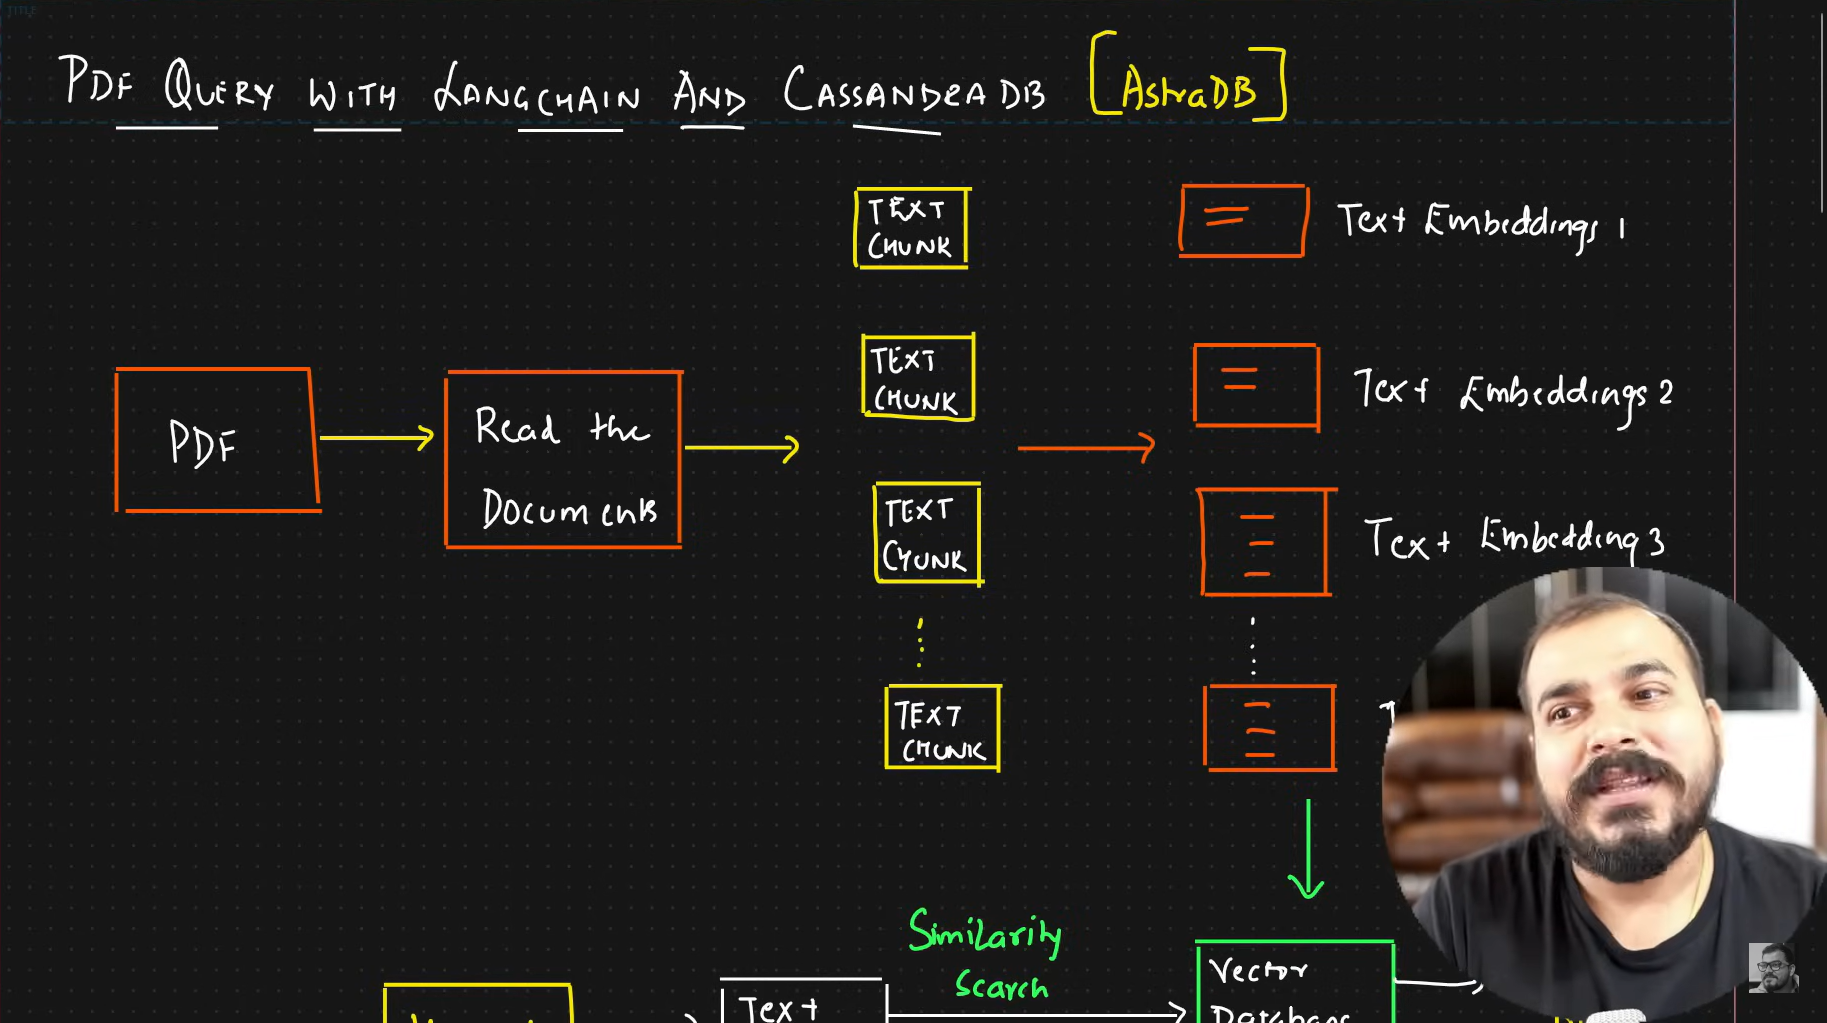

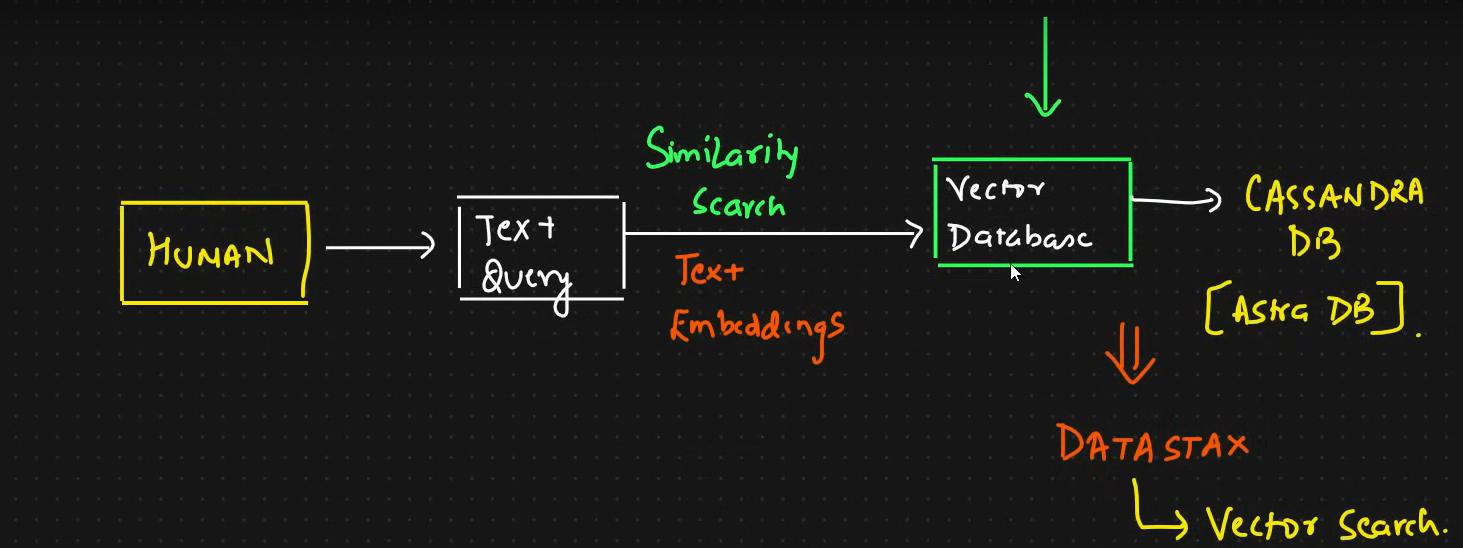

for Pdfquery application Cassandra DB(for the vector search) will be created in the cloud in a platform called as -->
## DataStax (https://www.datastax.com/)